# Python statistics I
<hr>

In this chapter, we explain how to perform statistical analysis on data using Python. Rather than delving into the theoretical and computational details of the statistical concepts and methods, we aim to provide intuitive, visual explanations that are easy to understand.

## Mean, Variance
<hr>

The `mean` value is the `average` value of a number of numeric data. To calculate the mean, find the sum of all numeric values, and divide the sum by the number of values.

`Variance` is the squared deviation of a variable from its mean. 
- A large variance indicates that the data is spread out, while a small variance indicates that the data is clustered closely around the mean.

We use the dataset "tips" as an example from the `Seaborn` library.

In [1]:
import seaborn as sns

tips = sns.load_dataset('tips')
tips                       

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


The following codes draw a graph of the data in the column "tip".

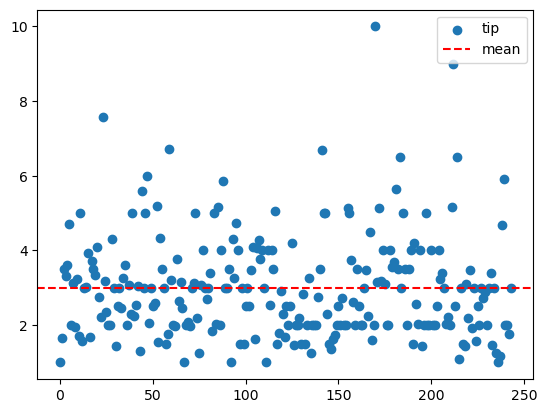

In [2]:
import matplotlib.pyplot as plt
import numpy as np

num = tips.shape[0]
plt.scatter(x=np.arange(num), y=tips["tip"], label="tip")
plt.axhline(y=np.mean(tips['tip']), color='r', linestyle='--', label='mean') # axhline can draw a horizonal line parallel to the axis
plt.legend()
plt.show()

To compute the mean, we can use the method `mean()` from `Numpy` or `Pandas`.

- The method `numpy` in `Numpy`can computer the average value of 

In [3]:
np.mean(tips["tip"])

2.99827868852459

Since "tips" is a `DataFrame` type, we can directly use the methods of Pandas to it.

In [4]:
tips["tip"].mean()

2.99827868852459

To compute the variance, we can use the method `var()` from `Numpy` or `Pandas`.

In [5]:
np.var(tips["tip"])

1.9066085124966428

In [6]:
tips["tip"].var()

1.9144546380624725

- The square root of the variance is called `standard deviation`. 

## Distribution
<hr>

In data analysis, the columns of a dataset represent random variables—quantities that fluctuate due to randomness. A `probability distribution` characterizes the likelihood of different values these variables may assume.

### Uniform distribution
<hr>

The uniform distribution is a probability distribution where each value within a certain range is **equally likely to occur** and values outside of the range never occur. 

For the visualization of the distribution of data, we can draw the histogram graph. 

<Axes: ylabel='Count'>

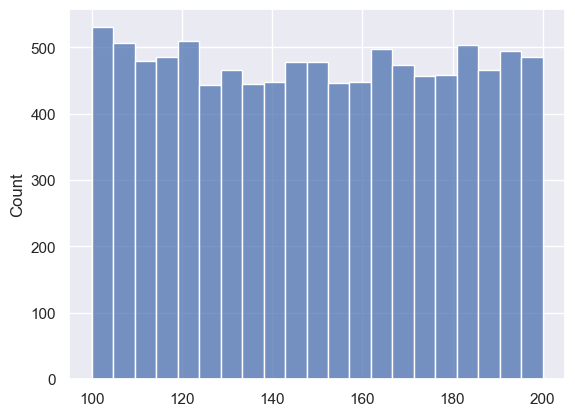

In [7]:
import numpy as np
import seaborn as sns

sns.set_theme()
data = np.random.uniform(100, 200, 10000) # generate 10000 random datas uniformally distributed between 50 and 100
sns.histplot(data=data) # use the histplot of seaborn to draw the histogram graph

For uniformly distributed data, the histogram typically displays bars of approximately equal height, resulting in a **flat** or level appearance.

### Normal distribution
<hr>

`Normal distribution`, also known as the Gaussian distribution, is a probability distribution that appears as a **"bell curve"** when graphed. The normal distribution describes a symmetrical plot of data around its mean value, where the width of the curve is related to the standard deviation. **The data near the mean are more frequent in occurrence than data far from the mean**.

The normal distribution is perhaps **the most important distribution**. Many real world phenomena, like IQ test scores and human heights/weights, roughly follow a normal distribution. Many common statistical tests also assume distributions are normal.

The central limit theorem says that the **sampling distribution of the mean will always be normally distributed**, as long as the **sample size is large enough**.

<Axes: ylabel='Count'>

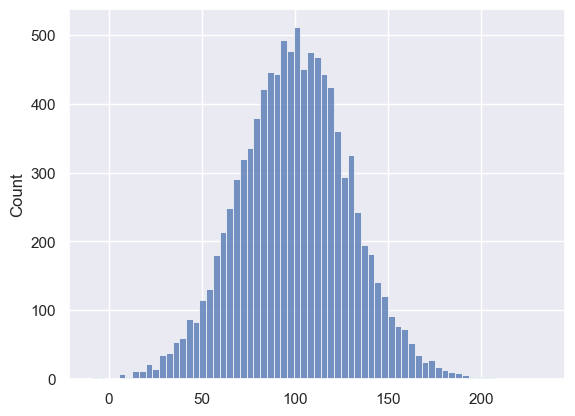

In [8]:
import numpy as np
import seaborn as sns

data = np.random.normal(100, 30, 10000) # generate 10000 random data normall distributed between 50 and 100
sns.histplot(data=data) # use the histplot of seaborn to draw the histogram graph

For uniformly distributed data, the histogram typically displays a **bell** shape.

## Correlation

<hr>

There are three types of correlation coefficients that can be computed by the `pandas.DataFrame.corr()` method: `Pearson Correlation (default)`, `Spearman Rank Correlation`, `Kendall Tau Correlation`.

The value of all three correlation coefficients ranges from -1 to +1.  What is a good correlation? It depends on the use, usually **at least 0.6 (or -0.6)** to call it a good correlation.

### Pearson correlation
<hr>

`Pearson Correlation` measures how strongly and in which direction two numerical variables are related in a **linear** fashion. 

Its value ranges from -1 to +1. When its value is positive, it signifies a direct (positive) relationship; when its value is negative, it signifies an inverse (negative) relationship. 

- Values of correlation closer to +1 or -1 suggest that the data points align more closely along a straight line, indicating a stronger linear relationship.
- Conversely, when correlation is near 0, the linear relationship is weak.

We usually first draw a graph to visulize the relationship of two variables before computing the correaltion values.

<Axes: xlabel='total_bill', ylabel='tip'>

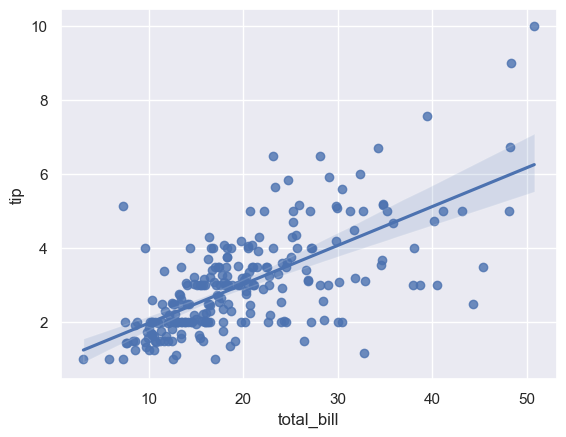

In [9]:
sns.regplot(data=tips, x="total_bill", y="tip")

In [10]:
tips['total_bill'].corr(tips['tip']) # compute the Pearson correlation

0.6757341092113645

- `Pearson Correlation` is **most common** of all the correlation measures.
- `Pearson Correlation is suitable when variables are **normally distributed and linearly related**.

### Spearman correlation
<hr>

The `Spearman correlation` coefficient is a measure of the **monotonicity** of the relationship between two **ranked/ordered datasets**. Its value varies between -1 and +1 with 0 implying no correlation. Correlations close to -1 or +1 imply a strong monotonic relationship. Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases.

<Axes: xlabel='size', ylabel='tip'>

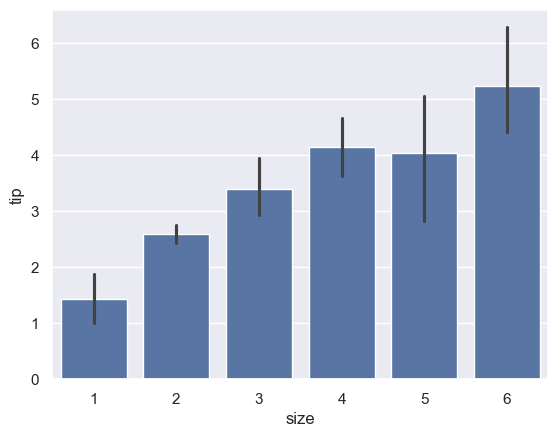

In [11]:
import matplotlib.pyplot as plt

sns.barplot(
    data=tips,
    x="size",
    y="tip", 
)

In [12]:
tips['size'].corr(tips['tip'], method="spearman") # compute the spearman correlation

0.46826792926211475

<Axes: xlabel='day', ylabel='tip'>

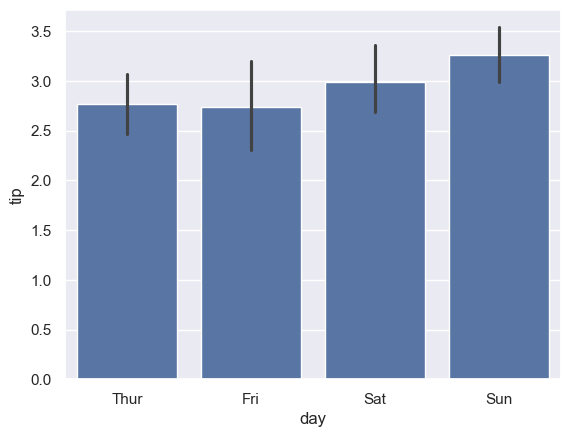

In [13]:
import matplotlib.pyplot as plt

sns.barplot(
    data=tips,
    x="day",
    y="tip", 
)

- Use Pandas' `factorize( )` method to obtain a numeric representation of catogorical data.

In [14]:
import pandas as pd

tips["day_numeric"] = pd.factorize(tips["day"])[0] # [1] is the orginal catogorical data
tips

,total_bill,tip,sex,smoker,day,time,size,day_numeric
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,0
2,21.01,3.50,Male,No,Sun,Dinner,3,0
3,23.68,3.31,Male,No,Sun,Dinner,2,0
4,24.59,3.61,Female,No,Sun,Dinner,4,0
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1
240,27.18,2.00,Female,Yes,Sat,Dinner,2,1
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1
242,17.82,1.75,Male,No,Sat,Dinner,2,1


In [15]:
tips['day_numeric'].corr(tips['tip'], method="spearman") # compute the spearman correlation

-0.17434544550231088

`Kendall Tau correlation` is similar to `Spearman correlation` but more focused on **pairwise disagreements between two ranking lists** and are more suitable for the data with many tied ranks. Due to space limitation, we omit its introduction.

The following table summerizes the differences of the three correlation measures.

| Feature                 | **Pearson**                      | **Spearman**                      | **Kendall Tau**                |
| ----------------------- | -------------------------------- | --------------------------------- | ------------------------------ |
| Relationship Measured   | Linear                           | Monotonic (can be non-linear)     | Monotonic (based on ranks)     |
| Sensitivity to Outliers | High                             | Low                               | Lower                          |
| Data Type Requirement   | Continuous, Normally Distributed | Ranked or Ordinal                 | Ranked or Ordinal              |
| Distribution Assumption | Assumes normality                | No distribution assumption        | No distribution assumption     |


## Hypothesis test
<hr>

Hypothesis testing enables data scientists to determine whether their findings, theories, or assumptions are the result of random chance or supported by statistical evidence.
- A hypothesis is a proposed explanation or prediction derived from prior knowledge or observation.

Examples of a hypothesis: (1) there is no relationship between gender and the amount of tips; (2) smokers give more tips than non-smokers.

There are two parts of a hypothesis:

* **Null Hypothesis ($H_0$):**
  The null hypothesis proposes that there is no effect or difference between the variables in two or more samples. For example, a null hypothesis might state, *"There is no relationship between gender and the amount of tips."*
  It is the default assumption and the one that is formally tested—either to be retained or rejected based on statistical evidence.

* **Alternative Hypothesis ($H_1$):**
  The alternative hypothesis suggests that there is a meaningful effect or difference between the variables. For instance, it might state, *"Gender has an impact on the amount of tips."*
  This hypothesis represents what we aim to support if the null hypothesis is rejected.

Below are some hypothesis testing terms:

1. `Level of Significance (α)`: often denoted as **α**, is the threshold we set to decide whether to reject the null hypothesis $H_0$.
    - A common value is **0.05**, meaning we are willing to accept a 5% chance of a false assumption.
    - If the **p-value ≤ α**, we **reject** the null hypothesis.

2. `p-value`: The **p-value** tells us how likely it is to observe our data, or something more extreme, **if the null hypothesis were true**.

   - A **small p-value** (typically ≤ 0.05) suggests that the observed result is unlikely under the null hypothesis $H_0$, and we reject it.
   - A **large p-value** indicates that the data is consistent with the null hypothesis $H_0$, and we accept it.

3. `Confidence Level`: The  confidence level tells us how confident we are that a **confidence interval** contains the true value of a population parameter (like the mean or proportion). **Confidence level = 1 - $\alpha$**, where $\alpha$ is the level of significance.

   - A **95% confidence level** means that if we repeated the experiment many times, about 95% of the resulting confidence intervals would contain the true value.

4. `Confidence Interval (CI)`: A confidence interval is a **range of values** estimated from sample data that is likely to contain the true value of a population parameter.

   - For example: “We are 95% confident that the true average height is between 170 cm and 175 cm.”

## t-test
<hr>

`Student's t-test` is a statistical test used to test whether the difference between the response of two groups is statistically significant or not. 

In this test, the test statistic follows a `Student's t-distribution` under the null hypothesis. This distribution is similar to normal distribution but with **slightly larger variance**, and is more suitable for testing the real life sampled data. In addition to mean and varariance, it has another parameter called `degree of freedom`, which is the number of values in the final calculation of a statistic that are free to vary.

There are 3 types t-tests in general and we can use the corresponding methods in the `scipy.stats` from the `scipy` library:

- One sample t-test → `ttest_1samp`
- Two independent sample t-test → `ttest_ind`
- Two dependent sample t-test → `ttest_rel`

Two events are `independent` if the occurrence of one event does not affect the chances of the occurrence of the other event. In hypothestis tests, `independent` means one sampeld data is not affected by other sampled data.

### One sample t-test 
<hr>

A **one-sample t-test** is to test whether the mean of a population equals to/not less than/not greater than a value specified in a null hypothesis. The syntax for the method `ttest_1samp` is below:

<table>
    <tr style="border-top:solid; border-bottom:solid">
        <th colspan=2 style="text-align:center">ttest_1samp(a, popmean, alternative='two-sided')</th>
    </tr>
    <tr>
        <td style="text-align:left">a</td>
        <td style="text-align:left">Array like, sampled observations</td>
    </tr>
    <tr>
        <td style="text-align:left">popmean</td>
        <td style="text-align:left">Usually float, expected value in null hypothesis</td>
    </tr>
    <tr>
        <td style="text-align:left", rowspan=3>alternative</td>
        <td style="text-align:left">"two-sided", $H_1$: the mean of the sampled data is different than the given population mean </td>
    </tr>
    <tr>
        <td style="text-align:left">"less", $H_1$: the mean of the sampled data is less than the given population mean </td>
    </tr>
    <tr style="border-bottom:solid">
        <td style="text-align:left">"greater", $H_1$: the mean of the sampled data is greater than the given population mean</td>
    </tr>
</table>

For example, we test the null hypothesis $H_0$: the mean of tips is equal to 3.

In [16]:
from scipy import stats
import seaborn as sns

tips = sns.load_dataset('tips')
stats.ttest_1samp(tips['tip'], popmean=3)

TtestResult(statistic=-0.019432641422916876, pvalue=0.9845119176410544, df=243)

- `ttest_1samp` return the t-statistics, p-value and the number of degrees of freedom.

Suppose we choose a confidence level 95% (or equivalently, significance level $\alpha=0.05$). Since the p-value is 0.98 > 0.05, we do not reject the null hypothesis $H_0$. Namely, we can believe that the mean of tips is equal to 3 (the probability is 98.45%).

For example, we test a one-sided null hypothesis $H_0$: the mean of tips is not less than 3.

In [17]:
tips = sns.load_dataset('tips')
stats.ttest_1samp(tips['tip'], popmean=3, alternative='less')

TtestResult(statistic=-0.019432641422916876, pvalue=0.4922559588205272, df=243)

Suppose we choose a confidence level 95% (or equivalently, significance level $\alpha=0.05$). Since the p-value is 0.49 > 0.05, we do not reject the null hypothesis $H_0$. Namely, we can believe that the mean of tips is not less than 3 (the probability is 50.77%).

### Two sample independent t-test 
<hr>

A two-sample t-test tests the null hypothesis such that the means of two populations are equal or the mean of one population is not less than/not greater than another. This can be done by the method `ttest_ind()`, the syntex of which is below:

<table>
    <tr style="border-top:solid; border-bottom:solid">
        <th colspan=2 style="text-align:center">ttest_ind(a, b, equal_var=True, alternative='two-sided')</th>
    </tr>
    <tr>
        <td style="text-align:left">a</td>
        <td style="text-align:left">Array like, sampled observations</td>
    </tr>
    <tr>
        <td style="text-align:left">b</td>
        <td style="text-align:left">Array like, the other sampled observations</td>
    </tr>
    <tr>
        <td style="text-align:left", rowspan=2>equal_var</td>
        <td style="text-align:left">If True (default), perform a standard independent 2 sample test that assumes equal population variances 
    </tr>
    <tr>
        <td style="text-align:left">If False, perform Welch’s t-test, which does not assume equal population variance</td>
    </tr>
    <tr>
        <td style="text-align:left", rowspan=3>alternative</td>
        <td style="text-align:left">"two-sided", $H_1$: the mean of the sampled data is different than the other sampled data </td>
    </tr>
    <tr>
        <td style="text-align:left">"less", $H_1$: the mean of the sampled data is less than the other sampled data </td>
    </tr>
    <tr style="border-bottom:solid">
        <td style="text-align:left">"greater", $H_1$: the mean of the sampled data is greater than the other sampled data</td>
    </tr>
</table>

## $\chi^2$ test

## Reliability and validity test
<hr>

## Linear regression
<hr>

使用 Python 做线性回归分析有好几种方式，常见的是用`statsmodels`库或者`sklearn`库。

假设有下面的数据存储在 excel 文件 line_regression.xlsx 中：

| 不良贷款  | 各项贷款余额 | 本年累计应收贷款 | 贷款项目个数 | 本年固定资产投资额 |
|-------|--------|----------|--------|-----------|
| 0\.9  | 67\.3  | 6\.8     | 5      | 51\.9     |
| 1\.1  | 111\.3 | 19\.8    | 16     | 90\.9     |
| 4\.8  | 173\.0 | 7\.7     | 17     | 73\.7     |
| 3\.2  | 80\.8  | 7\.2     | 10     | 14\.5     |
| 7\.8  | 199\.7 | 16\.5    | 19     | 63\.2     |
| 2\.7  | 16\.2  | 2\.2     | 1      | 2\.2      |
| 1\.6  | 107\.4 | 10\.7    | 17     | 20\.2     |
| 12\.5 | 185\.4 | 27\.1    | 18     | 43\.8     |
| 1\.0  | 96\.1  | 1\.7     | 10     | 55\.9     |
| 2\.6  | 72\.8  | 9\.1     | 14     | 64\.3     |
| 0\.3  | 64\.2  | 2\.1     | 11     | 42\.7     |
| 4\.0  | 132\.2 | 11\.2    | 23     | 76\.7     |
| 0\.8  | 58\.6  | 6\.0     | 14     | 22\.8     |
| 3\.5  | 174\.6 | 12\.7    | 26     | 117\.1    |
| 10\.2 | 263\.5 | 15\.6    | 34     | 146\.7    |
| 3\.0  | 79\.3  | 8\.9     | 15     | 29\.9     |
| 0\.2  | 14\.8  | 0\.6     | 2      | 42\.1     |
| 0\.4  | 73\.5  | 5\.9     | 11     | 25\.3     |
| 1\.0  | 24\.7  | 5\.0     | 4      | 13\.4     |
| 6\.8  | 139\.4 | 7\.2     | 28     | 64\.3     |
| 11\.6 | 368\.2 | 16\.8    | 32     | 163\.9    |
| 1\.6  | 95\.7  | 3\.8     | 10     | 44\.5     |
| 1\.2  | 109\.6 | 10\.3    | 14     | 67\.9     |
| 7\.2  | 196\.2 | 15\.8    | 16     | 39\.7     |
| 3\.2  | 102\.2 | 12\.0    | 10     | 97\.1     |

In [18]:
import seaborn as sns

print(sns.get_dataset_names())
dataset = sns.load_dataset('tips')
dataset

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


首先使用 pandas 读取 excel 数据：

In [19]:
import pandas as pd

# 下面前几行代码是为了运行 live code 而进行的设置，
# 与本章的教学内容无关
import os

if os.getcwd() == "/home/jovyan":
    os.chdir("data-science/")

# 正文
# 读取 excel 数据，引号里面是 excel 文件在电脑的存储位置
datas = pd.read_excel("datas/linear_regression.xlsx")

```{admonition} 注意
- 苹果电脑的文件地址用符号``/``分割，而 windows 系统的文件地址用符号``\``分割
- 文件地址前加上``r``能够保持字符串原始值的含义，而不对其中的符号进行转义
```

In [20]:
datas.head()

,不良贷款,各项贷款余额,本年累计应收贷款,贷款项目个数,本年固定资产投资额
0,0.9,67.3,6.8,5,51.9
1,1.1,111.3,19.8,16,90.9
2,4.8,173.0,7.7,17,73.7
3,3.2,80.8,7.2,10,14.5
4,7.8,199.7,16.5,19,63.2


### `statsmodels` 库
<hr>

使用`statsmodels` 库做回归一般有以下几个步骤：

- 通过 OLS 函数构建回归模型
- 通过 fit 函数拟合
- 通过summary 函数输出回归结果
- 通过 predict 函数得出回归的预测值

``OLS`` 函数的基本用法如下：

<table>   
    <tr style="border-top:solid; border-bottom:solid">
            <th colspan=2 style="text-align:center">OLS(endog, exog=None, missing='none',**kwargs)</th>
    </tr>
    <tr>
        <td style="text-align:left">endog</td>
        <td style="text-align:left">因变量（内生变量），是一个一维的数组</td>
    </tr>
    <tr>
        <td style="text-align:left">exog</td>
        <td style="text-align:left">自变量（外生变量），是一个一维或多维数组</td>
    </tr>
    <tr>
        <td style="text-align:left">missing</td>
        <td style="text-align:left">出现空值时的处理方式，可选设置为 'drop'（丢掉空值）, 'raise'（提醒错误）</td>
    </tr>
    <tr style="border-bottom:solid">
        <td style="text-align:left">**kwargs</td>
        <td style="text-align:left">其他设置</td>
    </tr>
</table>
<br />

函数 OLS 默认回归模型没有截距。若模型中有截距，必须对自变量数据使用一个`addconstant()`函数。

完整代码如下：

                            OLS Regression Results                            
Dep. Variable:                   不良贷款   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     56.75
Date:                Wed, 11 Jun 2025   Prob (F-statistic):           1.18e-07
Time:                        13:43:30   Log-Likelihood:                -51.508
No. Observations:                  25   AIC:                             107.0
Df Residuals:                      23   BIC:                             109.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8295      0.723     -1.147      0.2

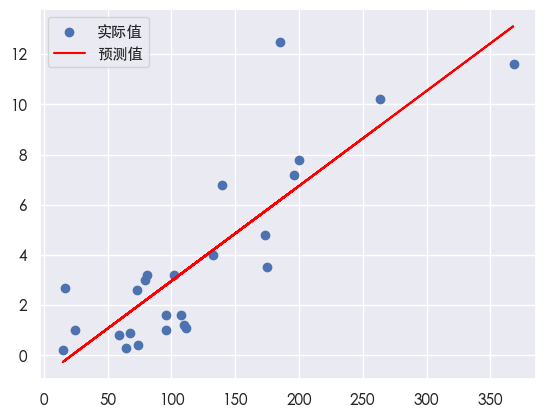

In [21]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 下面前几行代码是为了运行 live code 而进行的设置，
# 与本章的教学内容无关
import os

if os.getcwd() == "/home/jovyan":
    os.chdir("data-science/")

# 正文
datas = pd.read_excel("datas/linear_regression.xlsx")  # 读取 excel 数据，引号里面是 excel 文件的位置
y = datas.iloc[:, 0]  # 因变量为第 1列数据
x = datas.iloc[:, 1]  # 自变量为第 2 列数据
x = sm.add_constant(x)  # 若模型中有截距，必须有这一步
model = sm.OLS(y, x, hasconst=1)  # 构建最小二乘模型并拟合
results = model.fit()
print(results.summary())  # 输出回归结果

# 画图
# 下面几行代码使得 pyplot 画出的图形中可以显示中文
# mac 系统下字体: 黑体 'Heiti TC'，宋体：'Songti SC'; win 系统下黑体: 'SimHei'
# binder 下字体：'Noto Sans CJK JP'
import platform

os_name = platform.system()
if os_name == "Windows":
    font = "SimHei"
elif os_name == "Darwin":
    font = "Heiti TC"
else:
    font = "Noto Sans CJK JP"
plt.rcParams["font.sans-serif"] = [font]

predicts = results.predict()  # 模型的预测值
x = datas.iloc[:, 1]  # 自变量为第 3 列数据
plt.scatter(x, y, label="实际值")  # 散点图
plt.plot(x, predicts, color="red", label="预测值")
plt.legend()  # 显示图例，即每条线对应 label 中的内容
plt.show()  # 显示图形

`````{admonition} tips
:class: tip
- 若导入包时使用命令 import statsmodels.formula.api as sm, 则在回归分析时不用函数 add_constant 添加截距，但是必须使用统计语言给出模型信息。
`````

使用统计语言公式的代码：

```{code-block} python
import pandas as pd
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt

datas = pd.read_excel('datas\linear_regression.xlsx')  # 读取 excel 数据，引号里面是 excel 文件的位置
result = sm.ols('不良贷款~各项贷款余额', datas).fit() # 构建最小二乘模型并拟合，
                               #此时不用单独输入 x，y了，而是将自变量与因变量用统计语言公式表示，将全部数据导入
<hr>
print(result.summary()) # 输出回归结果

```

在多元回归中，只需把自变量改为多列数据即可，假如不良贷款为因变量，从第2列到第5列都是因变量，则使用 statsmodels 包的全部 python 代码如下：

In [22]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 下面前几行代码是为了运行 live code 而进行的设置，
# 与本章的教学内容无关
import os

if os.getcwd() == "/home/jovyan":
    os.chdir("data-science/")

# 正文
datas = pd.read_excel("datas/linear_regression.xlsx")  # 读取 excel 数据，引号里面是 excel 文件的位置
y = datas.iloc[:, 1]  # 因变量为第 2 列数据
x = datas.iloc[:, 2:6]  # 自变量为第 3 列到第 6 列数据
x = sm.add_constant(x)  # 若模型中有截距，必须有这一步
result = sm.OLS(y, x).fit()  # 构建最小二乘模型并拟合
print(result.summary())  # 输出回归结果

                            OLS Regression Results                            
Dep. Variable:                 各项贷款余额   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     30.32
Date:                Wed, 11 Jun 2025   Prob (F-statistic):           8.05e-08
Time:                        13:43:30   Log-Likelihood:                -123.70
No. Observations:                  25   AIC:                             255.4
Df Residuals:                      21   BIC:                             260.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -14.0689     16.072     -0.875      0.3

### sklearn 库
<hr>

sklearn 包是机器学习中常见的 python 包，做统计分析时，它并不能像 statsmodels 那样生成非常详细的统计分析结果。**默认自变量与因变量数据都是二维数据，自变量或因变量需要增加一个轴**。

使用`sklearn` 库做回归一把有以下几个步骤：

- 对自变量或因变量增加轴
- 通过 LinearRegression 函数构建回归模型
- 通过 fit 函数拟合
- 通过 predict 函数得出回归的预测值
- 通过 coef_，intercept_，score 等函数输出统计结果

对于上面同样的例子，一元回归的代码：

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# 下面前几行代码是为了运行 live code 而进行的设置，
# 与本章的教学内容无关
import os

if os.getcwd() == "/home/jovyan":
    os.chdir("data-science/")

# 正文
datas = pd.read_excel("datas/linear_regression.xlsx")  # 读取 excel 数据，引号里面是 excel 文件的位置
y = datas.iloc[:, 0].values  # 因变量为第 2 列数据
x = datas.iloc[:, 1].values  # 自变量为第 3 列数据

# 将 x，y 分别增加一个轴，以满足 sklearn 中回归模型认可的数据
x = x[:, np.newaxis]
y = y[:, np.newaxis]

model = LinearRegression()  # 构建线性模型
model.fit(x, y)  # 自变量在前，因变量在后
predicts = model.predict(x)  # 预测值
R2 = model.score(x, y)  # 拟合程度 R2
print("R2 = %.2f" % R2)  # 输出 R2
coef = model.coef_  # 斜率
intercept = model.intercept_  # 截距
print(model.coef_, model.intercept_)  # 输出斜率和截距

R2 = 0.71
[[0.03789471]] [-0.82952062]


用 sklearn 做多元回归时，因为自变量本身就是多维数据，不需要增加轴了，但因变量还需要增加轴，全部代码如下：

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

datas = pd.read_excel("datas/linear_regression.xlsx")  # 读取 excel 数据，引号里面是 excel 文件的位置
y = datas.iloc[:, 1].values  # 因变量为第 2 列数据
x = datas.iloc[:, 2:6].values  # 自变量为第 3 列到第 6 列数据

# 将 y 分别增加一个轴，以满足 sklearn 中回归模型认可的数据
# 此时由于 x 是多元变量，则不用添加新的轴了
y = y[:, np.newaxis]

model = LinearRegression()  # 构建线性模型
model.fit(x, y)  # 自变量在前，因变量在后
predicts = model.predict(x)  # 预测值
R2 = model.score(x, y)  # 拟合程度 R2
print("R2 = %.3f" % R2)  # 输出 R2
coef = model.coef_  # 斜率
intercept = model.intercept_  # 截距
print(model.coef_, model.intercept_)  # 输出斜率和截距

R2 = 0.812
[[3.30005331 4.35955755 0.61975042]] [-14.06888312]


多项式回归，广义最小二乘回归，Lasso 回归，逻辑回归，加权最小二乘回归，分位数回归等，都可以在`statsmodel`库或`sklearn`库中找到相应的函数。                                                   

## 主成分分析
<hr>

主成分分析（Principle Component Analysis, PCA）是数据降维的一个方法：原始数据中有很多特征变量，可以采用主成分分析方法将原始数据降维为少数几个变量，主成分就是降维后各原始变量的线性组合系数。

主成分分析的求解一般采用特征根分解，即求解原始数据**协方差矩阵或相关系数矩阵**最大特征根对应的特征向量，即为第一主成分，第二主成分为第二大特征根对应的特征向量，其他的主成分可以依次得出。主成分贡献率为对应特征根占所有特征根加和的比例。

采用 python 主成分分析时，常用的包为 sklearn，其他一些包也能做（例如 matplotlib.mlab.PCA）。需要注意的是

- 最好对原始数据进行标准化
- sklearn 计算主成分时使用的是协方差矩阵，而不是相关系数矩阵

sklearn 中的标准化函数有：


|函数|描述|
|:--|:--|
scale(X, axis=0, *)|对数据 X 进行 z 标准化，参数 axis 调整对列或对行标准化
StandardScaler()| z 标准化，列标准化
MinMaxScaler()| 最大最小标准化，列标准化
MaxAbsScaler()| 最大绝对值标准化，列标准化
... ...|


举例，下面一个统计数据：

|      | 食品    | 衣着   | 居住    | 家庭设备 | 交通通讯 | 文教娱乐 | 医疗保健 | 其他   |
|------|-------|------|-------|------|------|------|------|------|
| 北  京 | 1736  | 379  | 854   | 327  | 615  | 797  | 504  | 103  |
| 天  津 | 1171  | 257  | 614   | 117  | 328  | 329  | 179  | 40   |
| 河  北 | 888   | 156  | 399   | 101  | 222  | 226  | 135  | 39   |
| 山  西 | 830   | 202  | 201   | 69   | 160  | 280  | 103  | 33   |
| 内蒙古  | 1054  | 150  | 335   | 84   | 293  | 309  | 176  | 44   |
| 辽  宁 | 1127  | 221  | 378   | 100  | 301  | 377  | 234  | 68   |
| 吉  林 | 1003  | 168  | 257   | 82   | 285  | 261  | 194  | 56   |
| 黑龙江  | 924   | 184  | 527   | 74   | 257  | 277  | 254  | 49   |
| 上  海 | 2684  | 366  | 1320  | 458  | 748  | 937  | 562  | 204  |
| 江  苏 | 1569  | 191  | 512   | 168  | 364  | 479  | 199  | 85   |
| 浙  江 | 2061  | 319  | 914   | 260  | 618  | 723  | 416  | 121  |
| 安  徽 | 1000  | 117  | 345   | 106  | 197  | 257  | 134  | 41   |
| 福  建 | 1518  | 187  | 457   | 154  | 366  | 357  | 154  | 100  |
| 江  西 | 1221  | 125  | 326   | 96   | 230  | 276  | 155  | 56   |
| 山  东 | 1088  | 160  | 446   | 137  | 294  | 377  | 188  | 46   |
| 河  南 | 859   | 132  | 318   | 83   | 160  | 178  | 123  | 39   |
| 湖  北 | 1192  | 125  | 310   | 110  | 223  | 272  | 135  | 62   |
| 湖  南 | 1433  | 128  | 307   | 114  | 219  | 329  | 168  | 58   |
| 广  东 | 1789  | 144  | 530   | 152  | 412  | 361  | 204  | 116  |
| 广  西 | 1187  | 79   | 380   | 95   | 214  | 226  | 123  | 44   |
| 海  南 | 1135  | 66   | 146   | 92   | 178  | 199  | 93   | 60   |
| 重  庆 | 1130  | 96   | 231   | 96   | 163  | 250  | 143  | 33   |
| 四  川 | 1244  | 116  | 234   | 102  | 172  | 225  | 144  | 36   |
| 贵  州 | 820   | 80   | 236   | 62   | 99   | 161  | 72   | 24   |
| 云  南 | 976   | 80   | 226   | 67   | 100  | 183  | 122  | 35   |
| 西  藏 | 1185  | 182  | 84    | 81   | 79   | 28   | 44   | 39   |
| 陕  西 | 813   | 124  | 212   | 84   | 163  | 297  | 166  | 38   |
| 甘  肃 | 859   | 92   | 241   | 74   | 155  | 258  | 114  | 27   |
| 青  海 | 893   | 156  | 329   | 84   | 208  | 110  | 152  | 43   |
| 宁  夏 | 923   | 143  | 346   | 77   | 178  | 178  | 199  | 51   |
| 新  疆 | 804   | 171  | 333   | 68   | 183  | 159  | 169  | 36   |


主成分分析的 Python 代码为：

In [25]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import pandas as pd
import numpy as np

# 下面前几行代码是为了运行 live code 而进行的设置，
# 与本章的教学内容无关
import os

if os.getcwd() == "/home/jovyan":
    os.chdir("data-science/")

# 正文
df = pd.read_excel("datas/data-pca.xlsx", index_col=0)  # 读取数据
data = scale(df.values)  # z标准化，标准化之后就自动根据协方差矩阵进行主成分分析了
# data2 = np.corrcoef(np.transpose(data)) # 没有必要单独计算协方差阵或相关系数阵
pca = PCA(n_components=3)  # 可以通过参数 n_components 调整主成分个数
pca.fit(data)
print("特征根：", pca.explained_variance_)  # 输出特征根
print()
print("主成分：", pca.components_)  # 输出主成分

特征根： [7.32679152 0.46898546 0.16208403]

主成分： [[ 0.34197826  0.32541509  0.36029958  0.36486138  0.3682146   0.36096996
   0.35616496  0.34854195]
 [-0.54451489  0.61527353  0.11520953 -0.11674732  0.03494752  0.07480108
   0.2943857  -0.4522824 ]
 [ 0.27960446  0.69192655 -0.19973533 -0.07235855 -0.02963776 -0.42452329
  -0.39881297  0.24037227]]


## Kmeans 聚类
<hr>

Kmeans 是一种动态聚类方法，其基本思想是：首先随机选取 K 个点作为初始凝聚点，按照距离最近原则划分为 K 类；然后重新计算 K 个类的重心作为新的凝聚点，再按照距离最近原则重新分类；重复这一过程，直到重心不再变化为止。

对上面的例子，进行 Kmeans 聚类并画图的代码为：

[1 0 2 2 2 0 2 0 1 0 1 2 0 2 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2]
类别1
['天  津', '辽  宁', '黑龙江', '江  苏', '福  建', '山  东', '广  东']
类别2
['北  京', '上  海', '浙  江']
类别3
['河  北', '山  西', '内蒙古', '吉  林', '安  徽', '江  西', '河  南', '湖  北', '湖  南', '广  西', '海  南', '重  庆', '四  川', '贵  州', '云  南', '西  藏', '陕  西', '甘  肃', '青  海', '宁  夏', '新  疆']


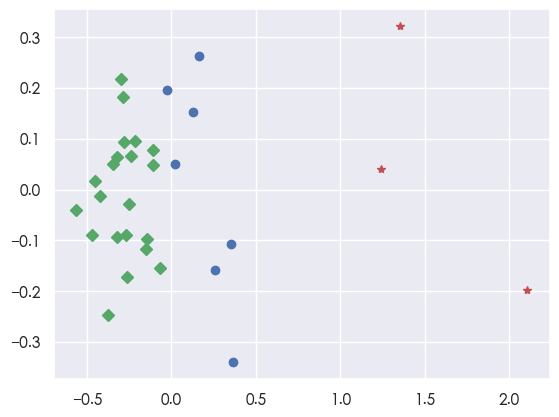

In [26]:
import warnings

warnings.filterwarnings("ignore")  # 忽略掉使用默写函数的一些警告信息

import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# 下面前几行代码是为了运行 live code 而进行的设置，
# 与本章的教学内容无关
import os

if os.getcwd() == "/home/jovyan":
    os.chdir("data-science/")

# 正文
# 将上述数据放到 excel 里，并用 pandas 读取
df = pd.read_excel("datas/data-pca.xlsx", index_col=0)

scale_values = MinMaxScaler().fit_transform(df.values)  # 数据表转化预处理

kmeans = KMeans(n_clusters=3).fit(scale_values)  # 分为 3 类, 参数 n_init= 'auto' 设置初始聚类的运行次数
print(kmeans.labels_)  # 输出判别结果列表

# 具体输出判别结果
cluster_1 = []
cluster_2 = []
cluster_3 = []
for i, j in enumerate(kmeans.labels_):
    if j == 0:
        cluster_1.append(df.index[i])
    elif j == 1:
        cluster_2.append(df.index[i])
    else:
        cluster_3.append(df.index[i])
print("类别1")
print(cluster_1)
print("类别2")
print(cluster_2)
print("类别3")
print(cluster_3)

# draw pictures by tsne, or pca, 利用主成分降为 2 维，并画图显示分类结果
# from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

tsne = PCA(n_components=2).fit_transform(scale_values)  # tsne
df2 = pd.DataFrame(tsne)
df2["labels"] = kmeans.labels_

df_1 = df2[df2["labels"] == 0]
df_2 = df2[df2["labels"] == 1]
df_3 = df2[df2["labels"] == 2]

# 画图
plt.plot(df_1[0], df_1[1], "bo", df_2[0], df_2[1], "r*", df_3[0], df_3[1], "gD")
plt.show()

## 人工神经网络
<hr>


神经网络的目标是：找到一个能把一组输入最好地映射到其正确输出的函数。例如一个简单的分类任务，其中输入是动物的图像，正确的输出将是动物的名称。或者根据历史需求数据，预测未来一期的需求。神经网络的思想类似回归分析中经常用到的拟合，都用到了最小二乘的思想：数学意义上的决策目标是：选取一些参数（神经网络中每个输入的权重），使得拟合的输出与期望输出的误差平方和最小。

下面是一个神经网络示意图（输入层有一些神经元，隐含层有一些神经元，输出层有一些神经元），输入信息经过正向传播到输出，计算实际输出与期望输出的误差后，在反向传播误差；重复这个过程，在传播过程中，不断减少误差，直到误差减少到一定程度终止。

![ann.png](_build/html/_images/ann.png)

用 BP 神经网络预测 sklearn 包中自带的乳腺癌数据例子：

In [27]:
# 测试一下癌症数据
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

cancer = datasets.load_breast_cancer()
cancer_data = cancer["data"]
cancer_target = cancer["target"]

# 将数据集划分为训练集，测试集
(
    cancer_data_train,
    cancer_data_test,
    cancer_target_train,
    cancer_target_test,
) = train_test_split(cancer_data, cancer_target, test_size=0.2)

# 数据标准化
stdScaler = StandardScaler().fit(cancer_data_train)
cancer_trainStd = stdScaler.transform(cancer_data_train)
cancer_testStd = stdScaler.transform(cancer_data_test)

# 建立 BP 模型
bpnn = MLPClassifier(
    hidden_layer_sizes=(20, 10),  # 神经元隐含层的大小
    max_iter=200,
    solver="adam",
    random_state=45,
)
bpnn.fit(cancer_trainStd, cancer_target_train)

# 预测
y_pred = bpnn.predict(cancer_testStd)  # 返回预测结果
print("神经网络预测结果评价报告：\n", classification_report(cancer_target_test, y_pred))

神经网络预测结果评价报告：
               precision    recall  f1-score   support

           0       0.93      0.97      0.95        39
           1       0.99      0.96      0.97        75

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



其他常见的机器学习方法，例如随机森林，支持向量机，梯度提升等，都可以在`sklearn`库中找到相应的函数。

## 练习
<hr>

```{exercise}
:label: regression
使用python 中的`statsmodels`库或`sklearn`库，编程实现《统计学》或《计量经济学》课程上的一些数据分析习题。

```

<script src="https://giscus.app/client.js"
        data-repo="robinchen121/book-Python-Data-Science"
        data-repo-id="R_kgDOKFdyOw"
        data-category="Announcements"
        data-category-id="DIC_kwDOKFdyO84CgWHi"
        data-mapping="pathname"
        data-strict="0"
        data-reactions-enabled="1"
        data-emit-metadata="0"
        data-input-position="bottom"
        data-theme="light"
        data-lang="en"
        crossorigin="anonymous"
        async>
</script>

<!-- Toogle google translation -->
<div id="google_translate_element"></div>
<script type="text/javascript">
      function googleTranslateElementInit() {
        new google.translate.TranslateElement({ pageLanguage: 'en',
                  includedLanguages: 'en,zh-CN,zh-TW,ja,ko,de,ru,fr,es,it,pt,hi,ar,fa',
layout: google.translate.TranslateElement.InlineLayout.SIMPLE }, 'google_translate_element');
      }
</script>
<script type="text/javascript"
      src="https://translate.google.com/translate_a/element.js?cb=googleTranslateElementInit"
></script>
<br>